# Desafio de Ciência de Dados do Programa Lighthouse

Nosso objetivo é desenvolver um modelo de previsão de preços para um cliente que deseja criar uma plataforma de aluguéis temporários na cidade de Nova York. 

A estrutura do projeto será dada pelo método CRISP-DS.

## Fase 1: Análise Exploratória dos Dados (EAD)

### 1.1 Compreensão inicial dos dados

Nosso objetivo nesta fase é entender a estrutura dos dados, suas características, possíveis erros e preencher os dados faltantes.

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np

# visualização
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from IPython.display import HTML # type: ignore
import plotly.graph_objects as go # type: ignore

# Configuração para o notebook e plotagem de imagens
%matplotlib inline
def jupyter_settings():
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display(HTML('<style>.container { width:100% !important; }</style>'))
    sns.set()

jupyter_settings()

In [32]:
# Palette Setting
def get_colors(palette, n_colors):
    """
    Retorna cores distribuídas uniformemente em uma paleta, 
    considerando a quantidade de cores pedidas.

    Args:
    - palette (list): Lista de cores disponíveis.
    - n_colors (int): Número de cores necessárias.

    Returns:
    - list: Lista de cores selecionadas.
    """
    if n_colors <= 0:
        raise ValueError("O número de cores deve ser maior que 0.")
    if n_colors == 1:
        return [palette[len(palette) // 2]]  # Cor central da paleta
    if n_colors > len(palette):
        raise ValueError(f"A paleta só suporta até {len(palette)} cores.")

    # Distribuir as cores uniformemente
    indices = [round(i * (len(palette) - 1) / (n_colors - 1)) for i in range(n_colors)]
    return [palette[i] for i in indices]

# Exemplo de uso
import seaborn as sns

color_palette = ["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]
# setting as the palette
sns.set_palette(sns.color_palette(color_palette))
sns.color_palette(color_palette)


# Solicitar cores uniformemente distribuídas
colors1 = get_colors(color_palette, 1)  # 2 cores
colors2 = get_colors(color_palette, 2)  # 2 cores
colors3 = get_colors(color_palette, 3)  # 3 cores
colors5 = get_colors(color_palette, 5)  # 5 cores
colors8 = get_colors(color_palette, 8)  # 8 cores

O dataset foi fornecido pelo idealizador do desafio e possui a seguinte descrição das variáveis:

| **Variável**                     | **Descrição**                                                                                       |
|----------------------------------|---------------------------------------------------------------------------------------------------|
| **ID**                           | Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo                             |
| **Nome**                         | Representa o nome do anúncio                                                                       |
| **Host ID**                      | Representa o ID do usuário que hospedou o anúncio                                                  |
| **Host Name**                    | Contém o nome do usuário que hospedou o anúncio                                                   |
| **Bairro Group**                 | Contém o nome do bairro onde o anúncio está localizado                                             |
| **Bairro**                       | Contém o nome da área onde o anúncio está localizado                                               |
| **Latitude**                     | Contém a latitude do local                                                                         |
| **Longitude**                    | Contém a longitude do local                                                                        |
| **Room Type**                    | Contém o tipo de espaço de cada anúncio                                                           |
| **Price**                        | Contém o preço por noite em dólares listado pelo anfitrião                                        |
| **Mínimo Noites**                | Contém o número mínimo de noites que o usuário deve reservar                                       |
| **Número de Reviews**            | Contém o número de comentários dados a cada listagem                                              |
| **Última Review**                | Contém a data da última revisão dada à listagem                                                   |
| **Reviews por Mês**              | Contém o número de avaliações fornecidas por mês                                                  |
| **Calculado Host Listings Count**| Contém a quantidade de listagens por host                                                         |
| **Disponibilidade 365**          | Contém o número de dias em que o anúncio está disponível para reserva                             |

Como o nosso objetivo do nosso desafio é prever o preço de aluguéis temporários, que é uma variável contínua. Problemas desta natureza são descritos como um **problema de regressão**, no qual a variável-alvo (no caso, o preço por noite) assume valores numéricos contínuos, e o modelo busca estimar esses valores com base nos atributos fornecidos no dataset.

In [3]:
# importando dados
df = pd.read_csv('../data/teste_indicium_precificacao.csv')
df.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


Podemos obter as primeiras informações do nosso dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Temos 16 colunas e 48894 linhas, nais quais temos variáveis do tipo objeto, int e float. Já é possível notar que algumas variáveis possuem dados faltantes indicando que precisamos tratar alguns dados. 

Vamos olhar as variáveis com dados faltantes.

In [5]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Podemos ver que temos 4 colunas com dados faltantes, sendo `name` com 16, `host_name` 21, `ultima_review` e `review_por_mes` com 10052.

In [6]:
# Informações estatísticas dos dados
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Ao olharmos para as descrições estatísticas iniciais. Podemos notar que:

- A variável `price` possui um valor mínimo 0, o que representa um dado inconsistente, uma vez que, não podemos ter um aluguel com um preço zero ou sem valor. Para tratarmos, iremos adotar a estratégia de substituir o valor zero, pela média ou mediana de preços do seu respectivo bairro (`bairro_grou`).

No mais, as outras variáveis aparentam normalidade. Contudo, podemos voltar nesta etapa e revisar novamente, caso alguma inconsistência surja.

### 1.2 Limpeza e Tratamentos dos dados

Para variável `host_name` iremos substituir os dados faltantes por *Unknown* uma vez que essa variável não terá relevância na analise.  

Já para `name` que representa o nome do anúncio, por ser apenas 16 colunas, representando um valor muito baixo comparado ao dataset completo, iremos remove-los. 

Para as variáveis `ultima_review` e `review_por_mes`, as quais possuem um número de dados faltantes significantes nos leva a crer que esses imóveis podem nunca terem sidos alugados ou revisados. Portanto, podemos adotar como estratégia substituir esses os valores faltantes por zero nos dados faltantes em `review_por_mes` e pela data mais antiga de review os valores nulos do campo `ultima_review`. Contudo, está estratégia precisa ser confirmada com o time de negócios ou o time que coletou os dados. 

In [7]:
# Removendo os dados sem nome
df.dropna(subset=['nome'], inplace=True)

In [8]:
# Substituindo valores nulos de host_name por 'Unknown'
df['host_name'] = df['host_name'].apply(lambda x: 'Unknown' if pd.isnull(x) else x)

In [9]:
# Substituindo valores nulos de reviews_por_mes por 0.0
df['reviews_por_mes'] = df['reviews_por_mes'].apply(lambda x: 0 if pd.isnull(x) else x)

Antes, vamos converter `ultima_review` em datetime

In [10]:
# Convertendo o campo ultima_review para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

In [11]:
older_date = df['ultima_review'].min()
print(older_date)

2011-03-28 00:00:00


In [12]:
# substituindo os valores nulos de ultima_review por a data mais antiga
df['ultima_review'] = df['ultima_review'].apply( lambda x: older_date if pd.isnull(x) else x)

In [13]:
# verificando se ainda tem valores nulos
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [14]:
df.isna().sum()
    

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [15]:
df.shape

(48878, 16)

Os dados faltantes foram preenchidos com sucesso. Continuamos com 16 colunas, mas agora com 48878 linhas. 

Vamos continuar analisando as outras variáveis. 

In [16]:
# Analisando aos bairros
df['bairro_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
# Analisando os tipos de espaços
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

Vimos que temos valores zero para o preço de uma noite. Portanto, iremos adotar a estratégia de substituir o valor zero pela média de preços do seu respectivo bairro (`bairro_grou`).

In [18]:
# Identificando anúncios com preço zero 
df[df['price'] == 0]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
23160,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25432,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25633,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25752,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25777,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25793,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25794,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25795,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26258,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,2011-03-28,0.00,1,0
26840,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [19]:
len(df[df['price'] == 0])

11

Temos ao todo 11 anúncios com preço zero. Poderias tomar duas estratégias, a primeira seria remover estes anúncios, e a segunda seria substituir pelo valor da média de preços do seu respectivo bairro. Vamos adotar a segunda estratégia.

In [20]:
media_preços_por_bairro = df[df['price'] != 0].groupby('bairro_group')['price'].mean().astype(int)
media_preços_por_bairro

bairro_group
Bronx             87
Brooklyn         124
Manhattan        196
Queens            99
Staten Island    114
Name: price, dtype: int64

In [21]:
# substituindo os preços iguais a zero pela média do respective bairro
df['price'] = df.apply(lambda row: media_preços_por_bairro[row['bairro_group']] if row['price'] == 0 else row['price'], axis=1)


# substituindo os preços que contem NaN pela média do respective bairro
df['price'] = df.apply(lambda row: media_preços_por_bairro[row['bairro_group']] if pd.isna(row['price']) else row['price'], axis=1)

In [22]:
# Analisando os describe novamente
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.887800e+04,4.887800e+04,48878.000000,48878.000000,48878.000000,48878.000000,48878.000000,48878,48878.000000,48878.000000,48878.000000
mean,1.902100e+07,6.763151e+07,40.728946,-73.952168,152.751054,7.011150,23.281497,2017-03-18 19:09:02.526289920,1.091266,7.145914,112.783829
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.474718e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,2016-03-26 00:00:00,0.040000,1.000000,0.000000
50%,1.968806e+07,3.079257e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,2019-01-03 00:00:00,0.370000,1.000000,45.000000
75%,2.915342e+07,1.074344e+08,40.763110,-73.936280,175.000000,5.000000,24.000000,2019-06-19 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098260e+07,7.862091e+07,0.054528,0.046160,240.178911,20.016187,44.556558,NaN,1.597445,32.958075,131.609725


Agora temos que o valor mínimo para o anuncio não é mais zero, sendo o valor mínimo de preço igual a 10 dólares.

Vamos agora analisar se temos algum dado duplicado.

In [23]:
# Analisando duplicação de dados
duplacates = df.duplicated()
duplacates.sum()

0

In [24]:
# Removendo colunas que não possuem utilidades
df = df.drop(columns=['id','host_id', 'host_name'])

In [25]:
df.shape

(48878, 13)

Recapitulando o que foi feito nesta fase:

- Identificamos os dados faltantes;
- Removemos os dados faltantes na variável `name`;
- Para variável `host_name` iremos substituir os dados faltantes por *Unknown*;
- Substituímos os dados faltantes em `review_por_mes` por zero;
- Transformamos `ultimo_review` em datetime;
- Substituímos dos dados faltantes em `ultimo_review` pela data mais antiga de review;
- Substituímos os valores zero e NaN em `price` pela média do valor da noite em seus respectivos bairros;
- Removemos o `id`, `host_id` e `host_name`

Ficamos com 13 colunas e 48878 linhas.

### 1.3 Detecção de Outliers

É importante identificar os outliers, uma vez que eles representam valores que estão muito fora do padrão quando comparados com os demais valores da variável. Para realizarmos esta análise, iremos usar o método do **intervalo interquartil (IQR - Interquartil Range)**, que é uma técnica usada para separar os dados em conjuntos.

Vamos inicialmente olharmos para distribuição das variáveis numéricas do nosso conjunto de dados para validar a presença de outliers.

In [26]:
# Separando as colunas numéricas
numerical = df.select_dtypes(include=['float64', 'int64'])
numerical

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,40.75362,-73.98377,225,1,45,0.38,2,355
1,40.80902,-73.94190,150,3,0,0.00,1,365
2,40.68514,-73.95976,89,1,270,4.64,1,194
3,40.79851,-73.94399,80,10,9,0.10,1,0
4,40.74767,-73.97500,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...
48889,40.67853,-73.94995,70,2,0,0.00,2,9
48890,40.70184,-73.93317,40,4,0,0.00,2,36
48891,40.81475,-73.94867,115,10,0,0.00,1,27
48892,40.75751,-73.99112,55,1,0,0.00,6,2


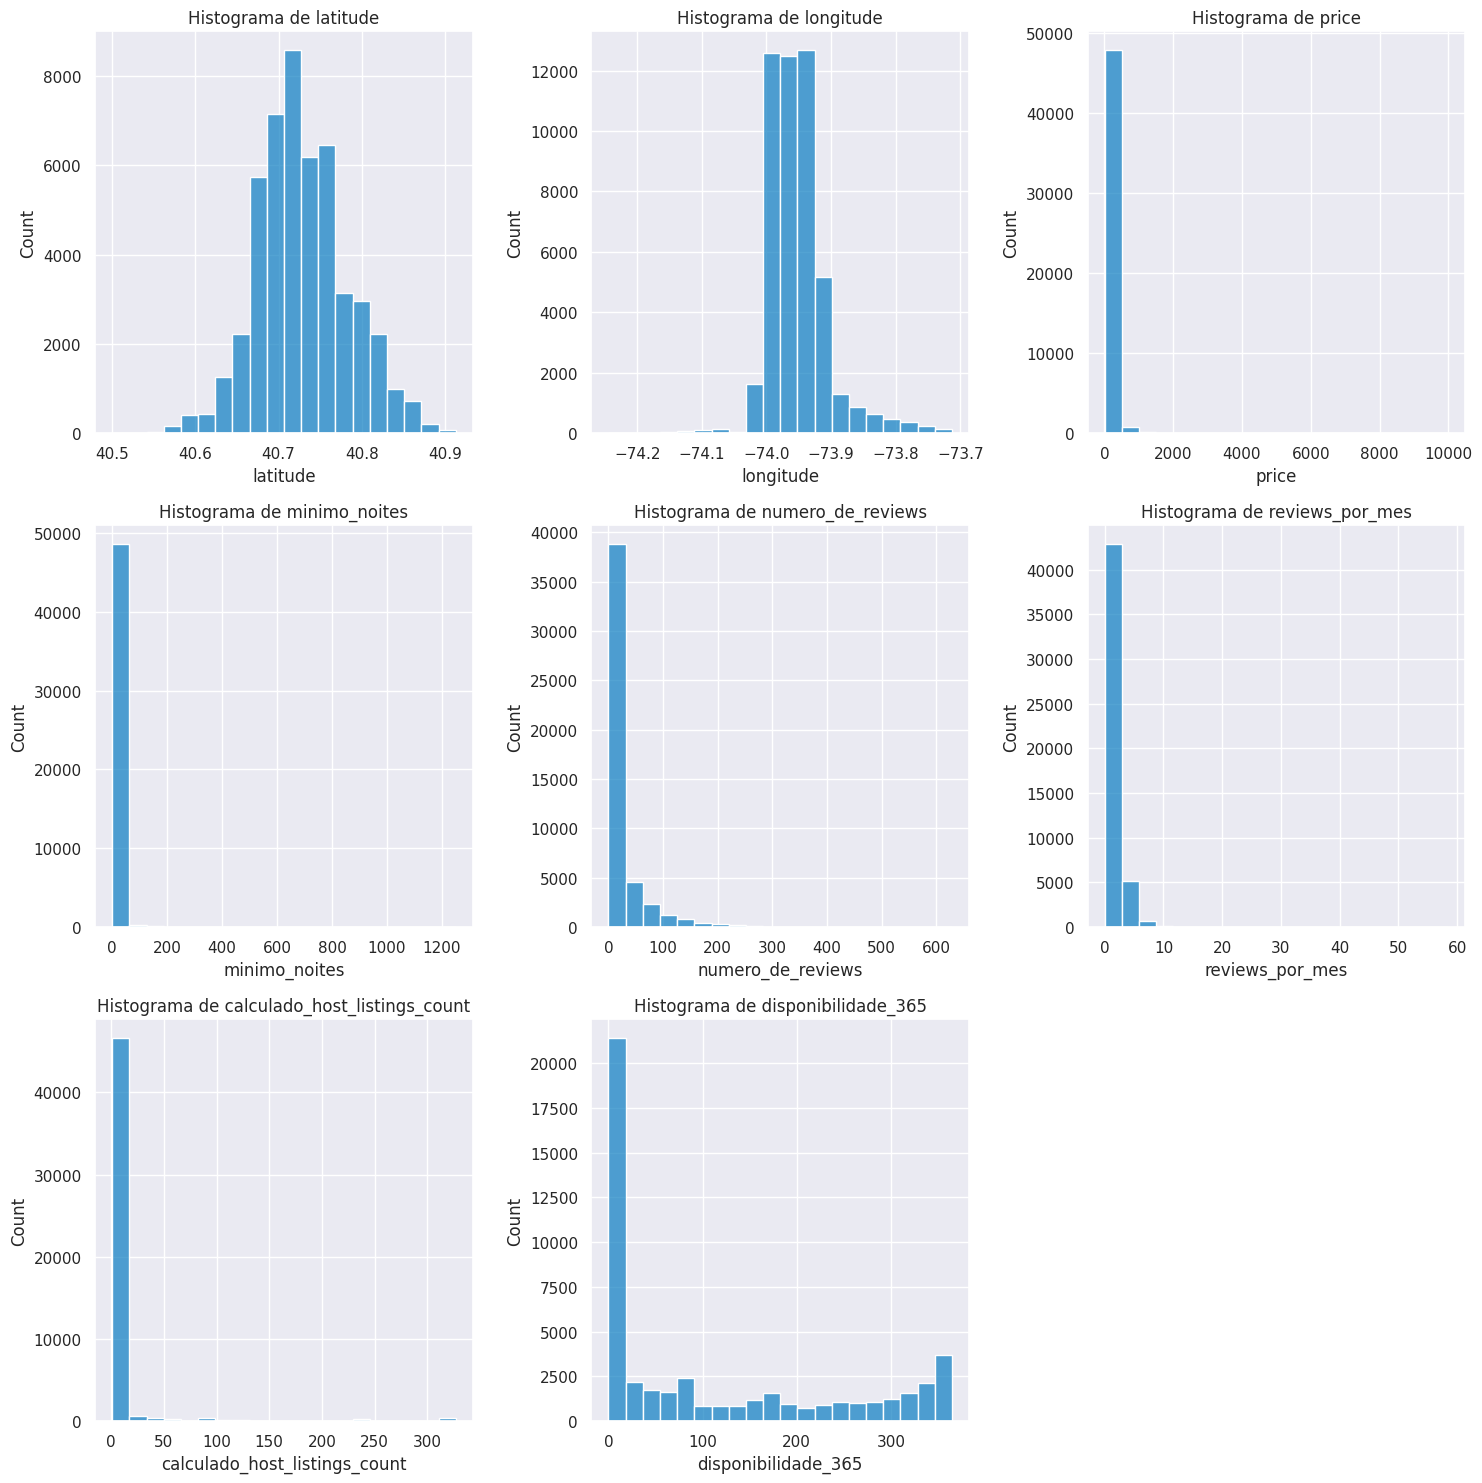

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))

for col, ax in zip(numerical.columns, axes.flatten()):
    sns.histplot(data=numerical, x=col, ax=ax, bins=20)
    ax.set_title(f'Histograma de {col}')

# Removendo os eixos em branco
# Calcula quantos subplots são realmente necessários
num_plots = len(numerical.columns)

# Remove os eixos excedentes
for ax in axes.flatten()[num_plots:]:
    ax.remove()

plt.tight_layout()
plt.show()

- Para as variáveis de `longitude` e `latitude`, não devemos nos preocupar, pois são variáveis de posição. O que notamos é que temos um concentração de espaços entorno da `latitude` 40.7 e `longitude` -74 à -73.9. Estes valores deve indica as regiões com mais espaços.

- Já a variável `price` tem como valor máximo 10000.0 dólares por noite, um valor muito alto. O mesmo para variáveis como `minino_noites`, `numero_de_review`, `review_por_mes`, `calculo_host_listing_count`.

- Na variável `disponibilidade_365` notamos que temos um grande número de espaços sem disponibilidades ao longo do ano. O que nos leva a refletir se esses espaços estão realmente disponíveis, estão alugados por longos períodos ou de fato existe uma super demanda para estes locais.

Inicialmente vamos tratar os outliers das variáveis `price` e `minimo_noites`. Podemos voltar aqui e rever estas escolhas, se tratar os outliers de outras variáveis podem alterar a predição do modelo.


Vamos iniciar pelo `price`:

In [28]:
price_describe =df['price'].describe()
price_describe['median'] = df['price'].median()

print("Descrição estatística da variável price")
print("="*38)
for stat_name, stat_value in price_describe.items():

    print(f"{stat_name:<10} {stat_value:.2f}")
print("="*38)

Descrição estatística da variável price
count      48878.00
mean       152.75
std        240.18
min        10.00
25%        69.00
50%        106.00
75%        175.00
max        10000.00
median     106.00


Notamos que o valor mínimo por noite é de 10 dólares e o máximo de 10000 dólares, sendo a média de 152 dólares e a mediana de 106 dólares. Estes resultados nos indicam a presença de outliers na variável `price`.

In [29]:
# Identificando os outliers

Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

inf_price = Q1_price - 1.5*IQR_price
sup_price = Q3_price + 1.5*IQR_price


print("Valores dos quartis")
print("="*38)
print(f'Primeiro Quartil (Q1): {Q1_price}\nTerceiro Quartil (Q3): {Q3_price}\nIntervalo Interquartil (IQR): {IQR_price}\nLimite superior de price: {sup_price}\nLimite inferior de price: {inf_price}')


Valores dos quartis
Primeiro Quartil (Q1): 69.0
Terceiro Quartil (Q3): 175.0
Intervalo Interquartil (IQR): 106.0
Limite superior de price: 334.0
Limite inferior de price: -90.0


Notemos que o limite inferior é negativo, o que indica que não temos outliers na parte inferior da distribuição. Portanto, devemos apenas garantir que os preços estejam dentro do limite superior. 

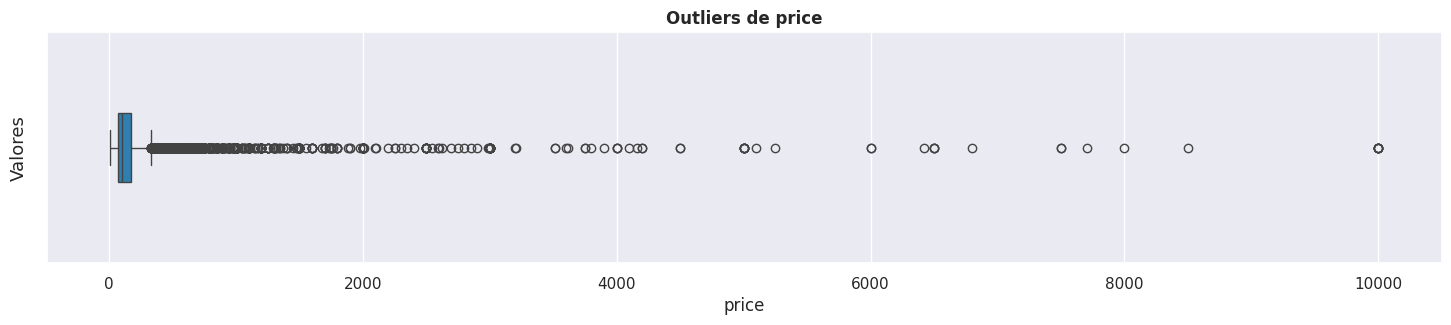

O dataset possui 48878 anúncios.
Sendo 2971 entradas acima do limite superior.
Que reprendam 6.08% do dataset.


In [37]:
fig = plt.figure(figsize=(18,3))
sns.boxplot(data=df, x='price', width=0.3)
plt.title(f'Outliers de price', fontsize=12, fontweight='bold')
plt.xlabel('price')
plt.ylabel('Valores', fontsize=13)

plt.show()

print(f'O dataset possui {df.shape[0]} anúncios.')
print(f'Sendo {len(df[df['price']>sup_price])} entradas acima do limite superior.')
print(f'Que reprendam {len(df[df['price']>sup_price])/df.shape[0]*100:.2f}% do dataset.')

In [38]:
# Identificando os outliers para variável 'minimo_noites'

Q1_minimo_noites = df['minimo_noites'].quantile(0.25)
Q3_minimo_noites = df['minimo_noites'].quantile(0.75)
IQR_minimo_noites = Q3_minimo_noites - Q1_minimo_noites

inf_minimo_noites = Q1_minimo_noites - 1.5*IQR_minimo_noites
sup_minimo_noites = Q3_minimo_noites + 1.5*IQR_minimo_noites


print("Valores dos quartis")
print("="*38)
print(f'Primeiro Quartil (Q1): {Q1_minimo_noites}\nTerceiro Quartil (Q3): {Q3_minimo_noites}\nIntervalo Interquartil (IQR): {IQR_minimo_noites}\nLimite superior de mínimo de noites: {sup_minimo_noites}\nLimite inferior de mínimo de noites: {inf_minimo_noites}')


Valores dos quartis
Primeiro Quartil (Q1): 1.0
Terceiro Quartil (Q3): 5.0
Intervalo Interquartil (IQR): 4.0
Limite superior de mínimo de noites: 11.0
Limite inferior de mínimo de noites: -5.0


Novamente temos que o limite inferior é negativo. Portanto, devemos apenas garantir que os preços estejam dentro do limite superior.

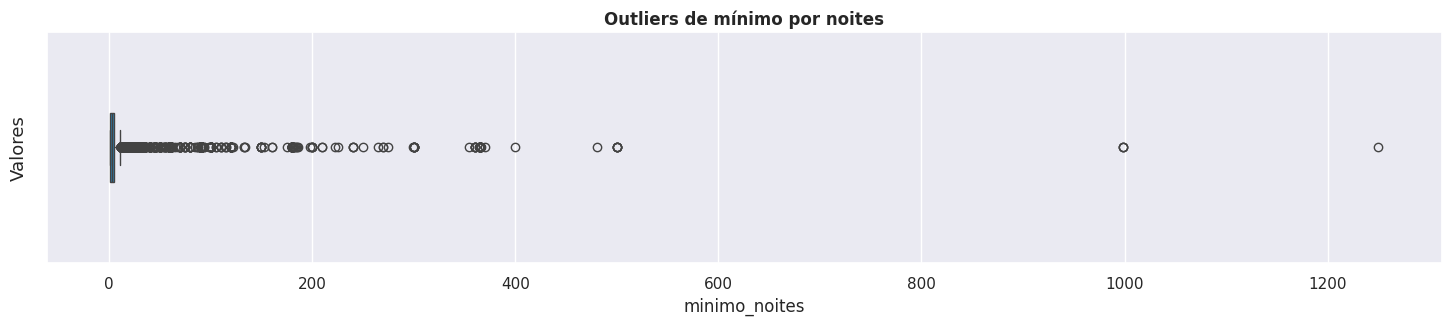

O dataset possui 48878 anúncios.
Sendo 6606 entradas acima do limite superior.
Que reprendam 13.52% do dataset.


In [39]:
fig = plt.figure(figsize=(18,3))
sns.boxplot(data=df, x='minimo_noites',  width=0.3)
plt.title(f'Outliers de mínimo por noites', fontsize=12, fontweight='bold')
plt.xlabel('minimo_noites')
plt.ylabel('Valores', fontsize=13)

plt.show()

print(f'O dataset possui {df.shape[0]} anúncios.')
print(f'Sendo {len(df[df['minimo_noites']>sup_minimo_noites])} entradas acima do limite superior.')
print(f'Que reprendam {len(df[df['minimo_noites']>sup_minimo_noites])/df.shape[0]*100:.2f}% do dataset.')

Vamos agora remover estes valores do nosso dataset.

In [40]:
# Deletando os outliers do dataset

# Fazendo uma copia do dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimo_noites > sup_minimo_noites].index, axis=0, inplace=True)

total_removido = df.shape[0] - df_clean.shape[0]
print(f"O dataset possuía {df.shape} antes da remoção dos outliers.")
print(f"O dataset possui agora {df_clean.shape} após a remoção dos outliers.")
print(f"Ao todo foram removidos {total_removido} anúncios do dataset, representando cerca de {total_removido/df.shape[0]*100:.2f} % do conjunto original do dados.")

O dataset possuía (48878, 13) antes da remoção dos outliers.
O dataset possui agora (39722, 13) após a remoção dos outliers.
Ao todo foram removidos 9156 anúncios do dataset, representando cerca de 18.73 % do conjunto original do dados.


Feita a remoção dos dados, vamos analisar como essas duas variáveis ficaram após a remoção. Inicialmente, olharemos para variável `price` e sua análise estatística inicial.

In [41]:
print("Descrição estatística da variável price\nantes da remoção dos outliers")
print("="*38)
for stat_name, stat_value in price_describe.items():

    print(f"{stat_name:<10} {stat_value:.2f}")
print("="*38)

Descrição estatística da variável price
antes da remoção dos outliers
count      48878.00
mean       152.75
std        240.18
min        10.00
25%        69.00
50%        106.00
75%        175.00
max        10000.00
median     106.00


In [42]:
price_describe_new =df_clean['price'].describe()
price_describe_new['median'] = df_clean['price'].median()

print("Descrição estatística da variável price\napós a remoção dos outliers")
print("="*38)
for stat_name, stat_value in price_describe_new.items():

    print(f"{stat_name:<10} {stat_value:.2f}")
print("="*38)

Descrição estatística da variável price
após a remoção dos outliers
count      39722.00
mean       119.03
std        67.16
min        10.00
25%        65.00
50%        100.00
75%        154.75
max        334.00
median     100.00


Podemos notar que a média  sofreu uma alteração, caindo de 152.75 para 119.03, o que também é refletido no desvio padrão, que foi de 240.18 para 67.16. E de forma interessante, a nossa mediana quase não sofreu alterações, indo de 106 para 100.

Vamos fazer o mesmo para variável `minimo_noites`:

In [43]:
minimo_noites_describe =df['minimo_noites'].describe()
minimo_noites_describe['median'] = df['minimo_noites'].median()

print("Descrição estatística da variável minimo_noites\nantes da remoção dos outliers")
print("="*38)
for stat_name, stat_value in minimo_noites_describe.items():

    print(f"{stat_name:<10} {stat_value:.2f}")
print("="*38)

Descrição estatística da variável minimo_noites
antes da remoção dos outliers
count      48878.00
mean       7.01
std        20.02
min        1.00
25%        1.00
50%        3.00
75%        5.00
max        1250.00
median     3.00


In [44]:
minimo_noites_describe_new =df_clean['minimo_noites'].describe()
minimo_noites_describe_new['median'] = df_clean['minimo_noites'].median()

print("Descrição estatística da variável minimo_noites\nantes da remoção dos outliers")
print("="*38)
for stat_name, stat_value in minimo_noites_describe_new.items():

    print(f"{stat_name:<10} {stat_value:.2f}")
print("="*38)

Descrição estatística da variável minimo_noites
antes da remoção dos outliers
count      39722.00
mean       2.70
std        1.86
min        1.00
25%        1.00
50%        2.00
75%        3.00
max        11.00
median     2.00


Notamos que a média também sofreu uma alteração significativa, indo de 7 para 2.7, o desvio padrão de 20.02 para 1.86, e a mediana de 3 para 2.

Vamos analisar novamente em termos dos histogramas e boxplot.

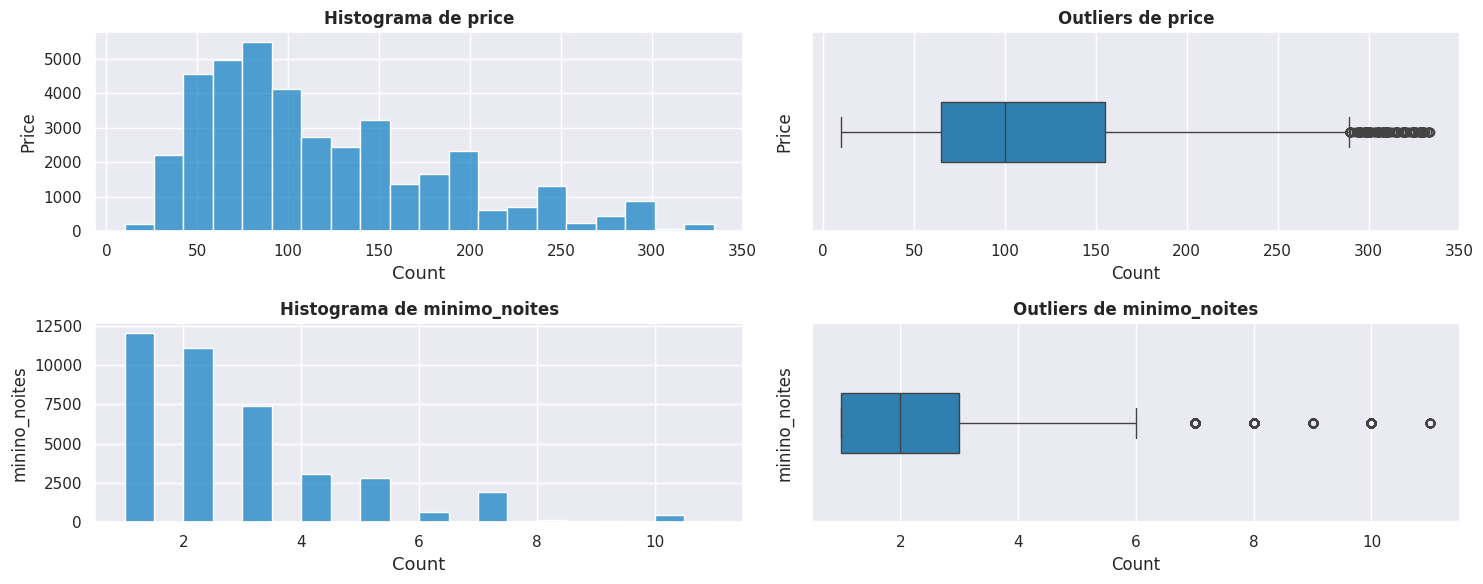

In [47]:
fig = plt.figure(figsize=(15,6))

plt.subplot(221)
sns.histplot(data=df_clean, x='price', bins=20)
plt.title(f'Histograma de price', fontsize=12, fontweight='bold')
plt.xlabel('Count', fontsize=13)
plt.ylabel('Price')


plt.subplot(222)
sns.boxplot(data=df_clean, x='price', width=0.3)
plt.title(f'Outliers de price', fontsize=12, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Price')

plt.subplot(223)
sns.histplot(data=df_clean, x='minimo_noites', bins=20)
plt.title(f'Histograma de minimo_noites', fontsize=12, fontweight='bold')
plt.xlabel('Count', fontsize=13)
plt.ylabel('minino_noites')


plt.subplot(224)
sns.boxplot(data=df_clean, x='minimo_noites', width=0.3)
plt.title(f'Outliers de minimo_noites', fontsize=12, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('minino_noites')

plt.tight_layout()
plt.show()

In [48]:
def plot_outliers(data, nrows, ncols, figsize=(15, 10), width=0.2, palette= None, title=None):
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    """
    Função para criar subplots com gráficos de boxplot para cada variável no DataFrame.

    Args:
    - data (DataFrame): O DataFrame contendo os dados.
    - nrows (int): Número de linhas de subplots.
    - ncols (int): Número de colunas de subplots.
    - figsize (tuple): Tamanho total da figura.
    - width (float): Largura das caixas no boxplot.
    - palette (str): Paleta de cores para os gráficos.
    - title (str): Título geral para os gráficos (opcional).

    Returns:
    - None. Exibe os gráficos.
    """
    # Criar a figura e os subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()  # Transformar os eixos em um array unidimensional

    # Iterar sobre as colunas do DataFrame e os eixos
    for i, (col, ax) in enumerate(zip(numerical_data.columns, axes)):
        sns.boxplot(data=numerical_data, x=col, palette=palette, width=width, ax=ax)
        ax.set_title(f'Outliers de {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel(f'{col}', fontsize=13)
        ax.set_ylabel('Valores', fontsize=13)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)

    # Remover subplots extras se houver menos variáveis que subplots
    for ax in axes[len(numerical_data.columns):]:
        fig.delaxes(ax)

    # Ajustar o layout geral
    plt.tight_layout()
    if title:
        fig.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    plt.show()


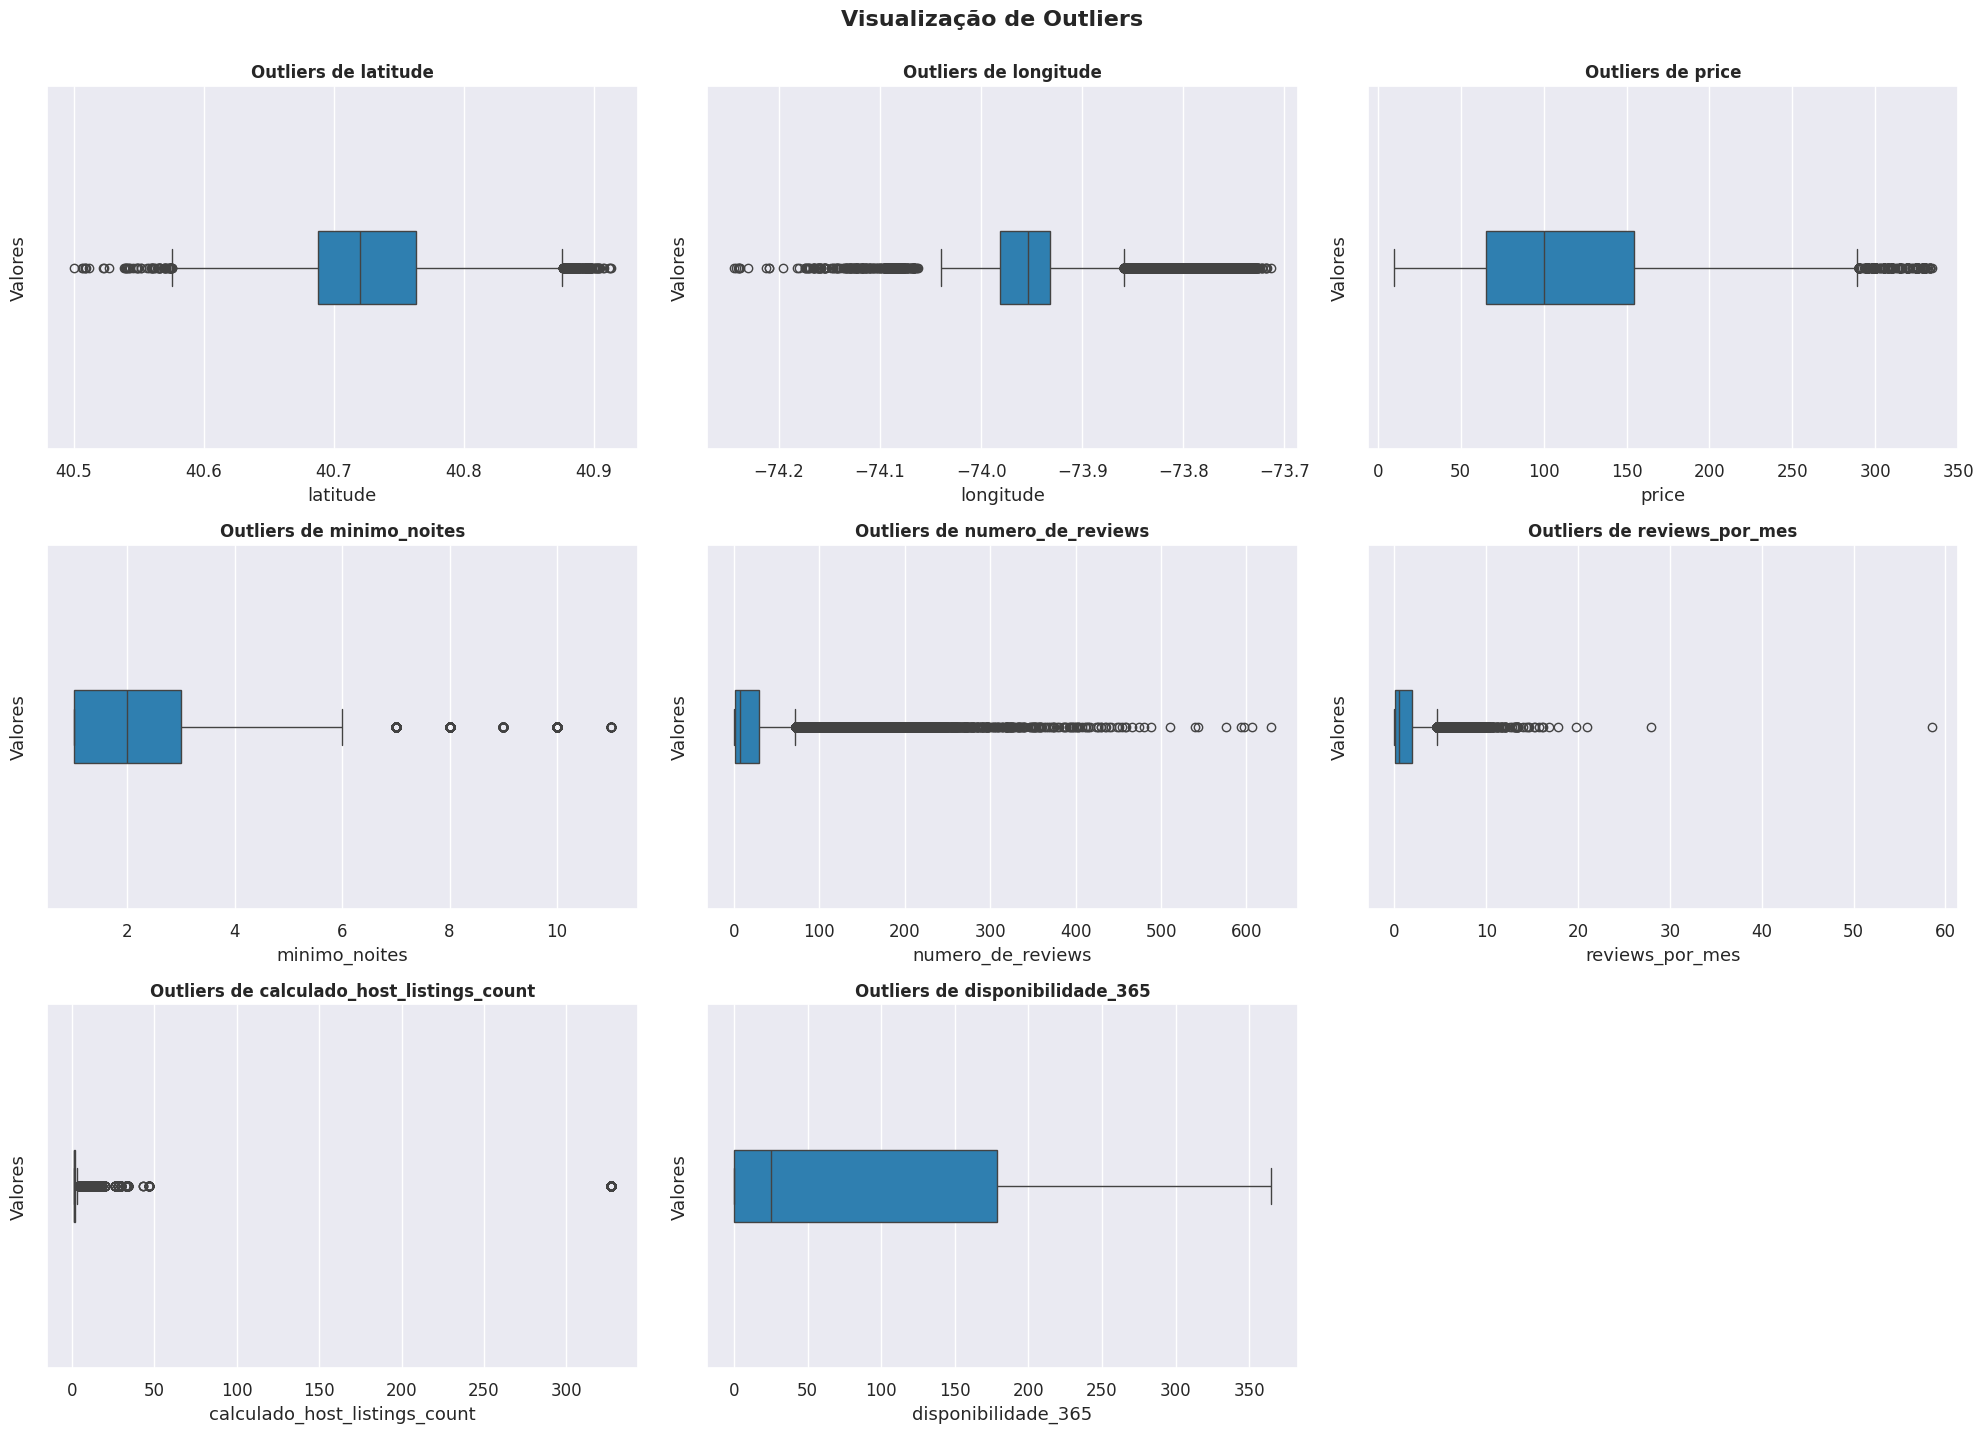

In [49]:
plot_outliers(
    data=df_clean,
    nrows=4,
    ncols=3,
    figsize=(20, 18),
    width=0.2,
   #palette=selected_colors,
    title='Visualização de Outliers'
)

Notamos que ainda temos outras variáveis com outliers, contudo neste momento as únicas variáveis que foram tratadas foram `price` e `minimo_noites`. Podemos voltar aqui e rever com base no resultado do modelo.

### 1.4 Analise bivariada

Agora vamos analisar o comportamento das variáveis entre si.

#### 1.4.1 Quais os bairros com maior rentabilidade

Iniciamos recalculando a média dos valores por grupo de bairros.

In [50]:
media_preços_por_bairro = df_clean.groupby('bairro_group')['price'].mean().astype(int).sort_values(ascending=False)
print(media_preços_por_bairro)

bairro_group
Manhattan        143
Brooklyn         107
Queens            91
Staten Island     89
Bronx             78
Name: price, dtype: int64


Também podemos visualizar por meio de um histograma

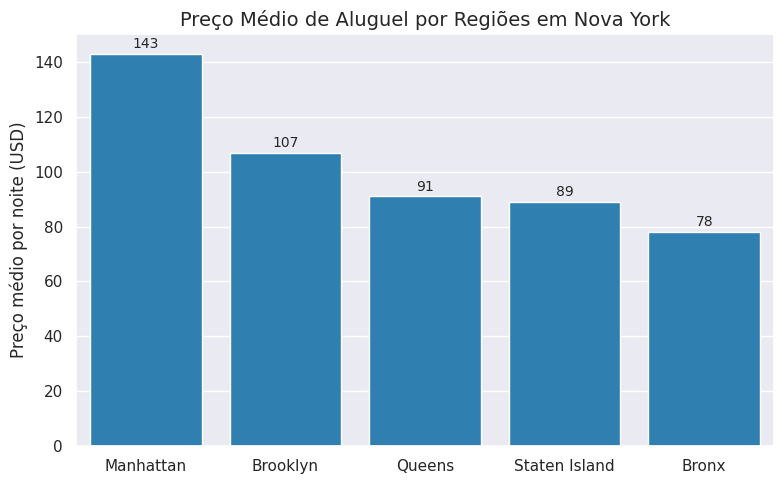

In [51]:
fig = plt.figure(figsize=(8, 5))
# Adicionar os valores acima de cada barra
sns.barplot(x=media_preços_por_bairro.index, y=media_preços_por_bairro.values)

# Adicionar os valores acima de cada barra
for i, value in enumerate(media_preços_por_bairro.values):
    plt.text(i, value + 1,  # Posição no eixo x e y (+1 para ajustar acima da barra)
             f'{value}',  # Texto do valor
             ha='center', va='bottom', fontsize=10)  # Alinhamento e estilo

plt.title('Preço Médio de Aluguel por Regiões em Nova York', fontsize=14)
plt.xlabel(None)
plt.ylabel('Preço médio por noite (USD)', fontsize=12)

plt.tight_layout()
plt.show()

Notamos que a região de Manhattan possui o maior valor médio de $\$\,143$ dólares para aluguéis de temporada, já a região do Bronx possui o menor valor de $\$\,78$ dólares.


<span style="color: red;">
a) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
</span>

Inicialmente poderíamos dizer que é o bairro de Manhattan por possuir a maior média por noite. Contudo, como temos variáveis que podem indicar a quantidade de reservas do estabelecimento foram feitas e o número mínimo de noites, como por exemplo, a variável `numero_review` e `minimo_noites`. Por meio dessas duas variáveis, podemos calcular uma estimativa de lucro mínimo por região.

In [52]:
# calcula o faturamento mínimo para cada anúncio
df_clean['faturamento_minimo'] = df_clean['minimo_noites'] * df_clean['price'] * df_clean['numero_de_reviews']

In [53]:
# média de faturamento mínimo por regão 
media_faturamento_minimo_regiao = df_clean.groupby('bairro_group')['faturamento_minimo'].mean().astype(int).sort_values(ascending=False)
media_faturamento_minimo_regiao

bairro_group
Manhattan        8341
Brooklyn         7194
Staten Island    5931
Queens           4922
Bronx            4314
Name: faturamento_minimo, dtype: int64

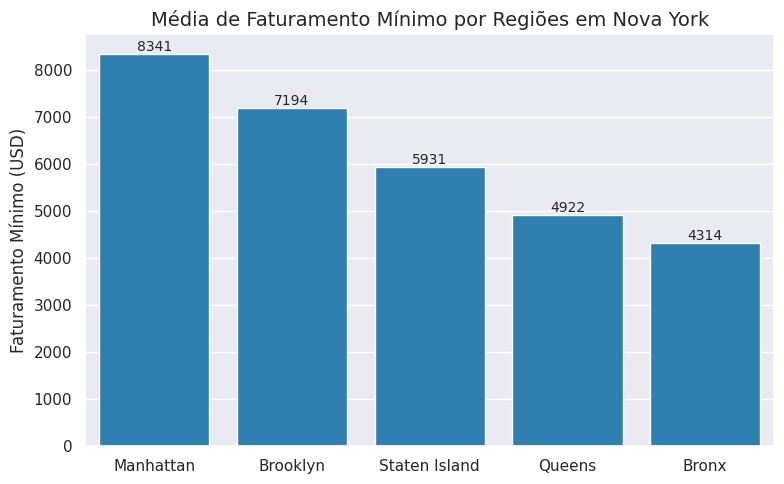

In [54]:
fig = plt.figure(figsize=(8, 5))
# Adicionar os valores acima de cada barra
sns.barplot(x=media_faturamento_minimo_regiao.index, y=media_faturamento_minimo_regiao.values)

# Adicionar os valores acima de cada barra
for i, value in enumerate(media_faturamento_minimo_regiao.values):
    plt.text(i, value + 1,  # Posição no eixo x e y (+1 para ajustar acima da barra)
             f'{value}',  # Texto do valor
             ha='center', va='bottom', fontsize=10)  # Alinhamento e estilo

plt.title('Média de Faturamento Mínimo por Regiões em Nova York', fontsize=14)
plt.xlabel(None)
plt.ylabel('Faturamento Mínimo (USD)', fontsize=12)

plt.tight_layout()
plt.show()

In [55]:
numero_anuncios_por_regiao =df_clean.groupby('bairro_group').size().sort_values(ascending=False)
numero_anuncios_por_regiao

bairro_group
Brooklyn         17341
Manhattan        16001
Queens            5027
Bronx             1009
Staten Island      344
dtype: int64

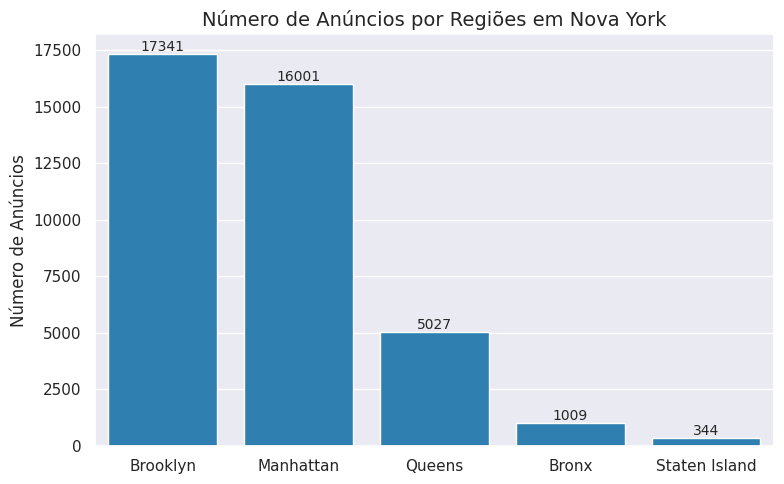

In [56]:
fig = plt.figure(figsize=(8, 5))
# Adicionar os valores acima de cada barra
sns.barplot(x=numero_anuncios_por_regiao.index, y=numero_anuncios_por_regiao.values)

# Adicionar os valores acima de cada barra
for i, value in enumerate(numero_anuncios_por_regiao.values):
    plt.text(i, value + 1,  # Posição no eixo x e y (+1 para ajustar acima da barra)
             f'{value}',  # Texto do valor
             ha='center', va='bottom', fontsize=10)  # Alinhamento e estilo

plt.title('Número de Anúncios por Regiões em Nova York', fontsize=14)
plt.xlabel(None)
plt.ylabel('Número de Anúncios', fontsize=12)

plt.tight_layout()
plt.show()

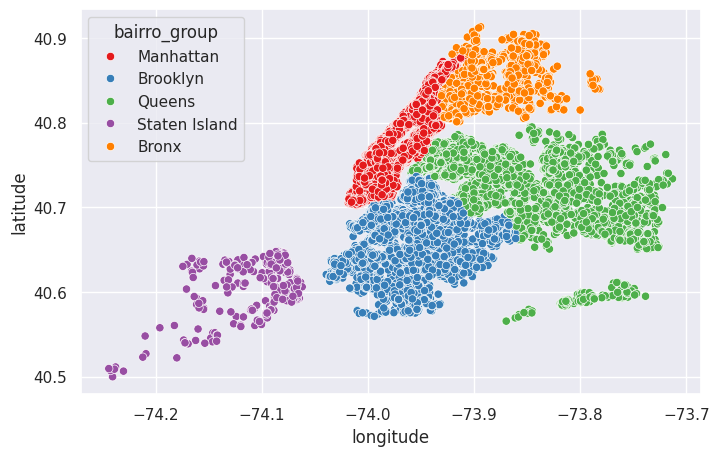

In [57]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.scatterplot(y = df_clean['latitude'], x = df_clean['longitude'], hue = df_clean['bairro_group'], palette='Set1')
plt.show()

Estes resultados nos confirma novamente que a região de Manhattan possui o maior faturamento mínimo, assim como, maior número de anúncios. Nos levando a escolher esta região na compra de um apartamento para alugar.

Podemos continuar e analisarmos qual área de Manhattan seria mais indicado.

In [58]:
#Filtrando os anúncios
manhattan_anuncios = df_clean[df_clean['bairro_group'] == 'Manhattan']

In [59]:
# Agrupando os anúncios por bairro e somando o faturamento mínimo desses bairros
manhattan_faturamento_minimo = manhattan_anuncios.groupby('bairro')['faturamento_minimo'].sum().sort_values(ascending=False)

print('Os 5 bairros com maior faturamento mínimo em Manhattan:')
print()
print(manhattan_faturamento_minimo.nlargest(5))

Os 5 bairros com maior faturamento mínimo em Manhattan:

bairro
Harlem             18712672
Hell's Kitchen     14649018
East Village       14468812
Upper West Side    10321030
Upper East Side     9778174
Name: faturamento_minimo, dtype: int64


Com esta informação sabemos que os 5 bairros mais promissores em termos de rentabilidade para alguém na plataforma seriam Harlem, Hell's Kitchen, East Village, Upper West Side e Upper East Side.

### 1.5 Análise dos tipos de Espaço

A variável `room_type` descreve os tipos de espaços disponíveis para alugar. Vamos analisar suas características em relação as demais variáveis.

In [60]:
df_clean['room_type'].value_counts()

room_type
Private room       19857
Entire home/apt    18876
Shared room          989
Name: count, dtype: int64

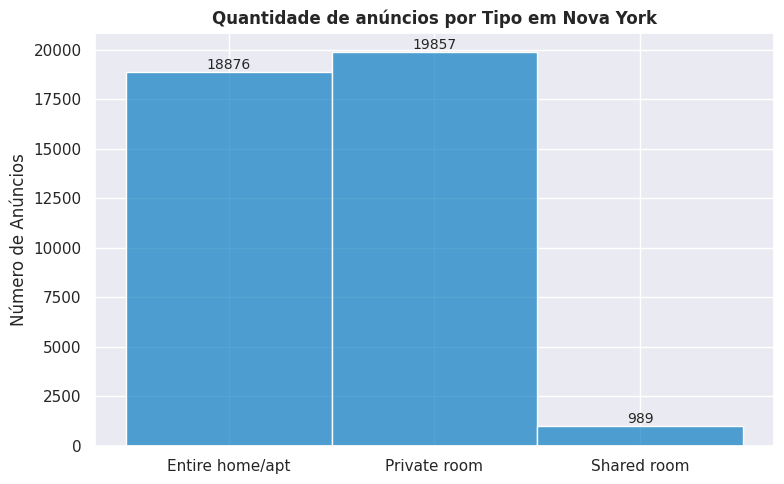

Temos que os tipos Entire home/apt e Private room juntos representam cerva de 97.51% dos anúncios.
E o tipo Shared room representam apenas 2.49% dos anúncios.


In [61]:
fig = plt.figure(figsize=(8, 5))

# Plotando o histograma
ax = sns.histplot(data=df_clean, x='room_type', discrete=True)

# Adicionar os valores acima de cada barra
for p in ax.patches:  # Itera sobre as barras do gráfico
    ax.annotate(f'{int(p.get_height())}',  # Texto com o valor (frequência)
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Posição no topo da barra
                ha='center', va='bottom', fontsize=10)  # Alinhamento e estilo


plt.title(f'Quantidade de anúncios por Tipo em Nova York', fontsize=12, fontweight='bold')
plt.xlabel(None)
plt.ylabel('Número de Anúncios')
# Ajusta espaçamento automaticamente
plt.tight_layout()

plt.show()

anun_priv_apt = df_clean[(df_clean['room_type'] == 'Private room') | (df_clean['room_type'] == 'Entire home/apt')]['room_type'].count()
anun_sh_room = df_clean[df_clean['room_type'] == 'Shared room']['room_type'].count()



print(f'Temos que os tipos Entire home/apt e Private room juntos representam cerva de {anun_priv_apt/df_clean.shape[0]*100:.2f}% dos anúncios.')
print(f'E o tipo Shared room representam apenas {anun_sh_room/df_clean.shape[0]*100:.2f}% dos anúncios.')

Note que a predominância do tipo de espaços para apartamentos inteiros e quartos privados, representando cerca de $97.51\%$ dos anúncios e os quartos compartilhados cerca de $2.49\%$ dos anúncios. Estes resultados indicam que quartos compartilhados tem menor impacto nos anúncios. Adicionando esta afirmação com a resposta anterior, podemos direcionar a compra de um apartamento com o intuito de alugar o apartamento inteiro ou apenas os quartos.

Vamos construir o faturamento médio por tipo de anúncio:

In [62]:
tipo_type_anuncios = df_clean.groupby('room_type')['faturamento_minimo'].mean().sort_values(ascending=False)
tipo_type_anuncios 


room_type
Entire home/apt    10781.887052
Private room        4237.714912
Shared room         1727.469161
Name: faturamento_minimo, dtype: float64

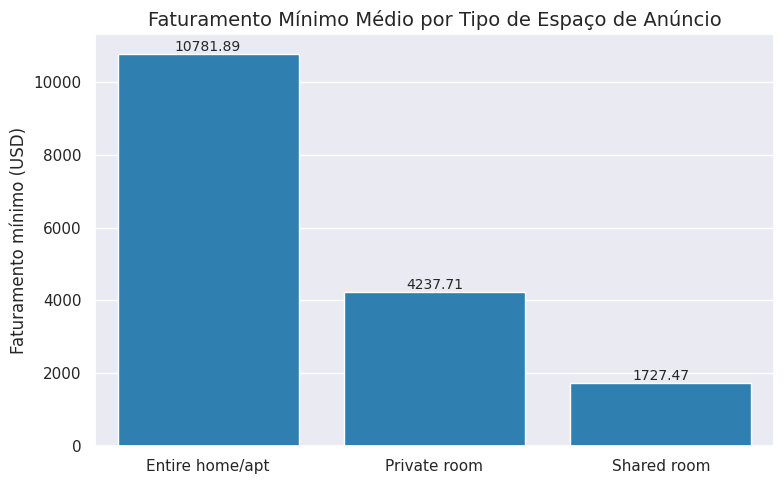

In [63]:
fig = plt.figure(figsize=(8, 5))
# Adicionar os valores acima de cada barra
sns.barplot(x=tipo_type_anuncios.index, y=tipo_type_anuncios.values)

# Adicionar os valores acima de cada barra
for i, value in enumerate(tipo_type_anuncios.values):
    plt.text(i, value + 1,  # Posição no eixo x e y (+1 para ajustar acima da barra)
             f'{value:.2f}',  # Texto do valor
             ha='center', va='bottom', fontsize=10)  # Alinhamento e estilo

plt.title('Faturamento Mínimo Médio por Tipo de Espaço de Anúncio', fontsize=14)
plt.xlabel(None)
plt.ylabel('Faturamento mínimo (USD)', fontsize=12)

plt.tight_layout()
plt.show()

Podemos ver que o faturamento mínimo por tido de espaço duas vezes maior para espaços do tipo casa ou apartamento. Novamente essa informação nos confirma nossa escolha de região para aquisição de um apartamento ou casa. 

Também podemos nos peguntar pelo faturamento mínimo por bairro, será que ao segregar o faturamento mínimo por bairro temos alguma diferença? Pois o faturamento mínimo que vimos foi a soma por bairro, pode ser que para o setor de casa ou apartamento, o faturamento mínimo por bairro não represente a mesma discrepância que o valor total.

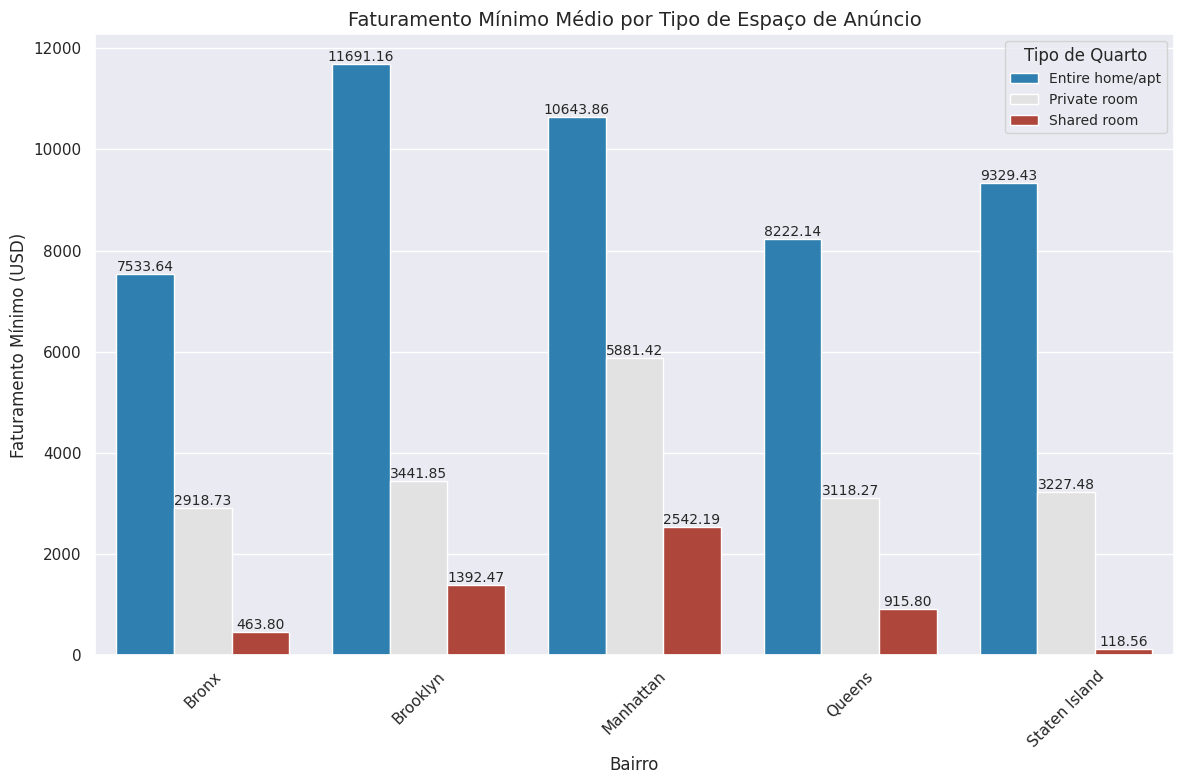

In [64]:
# Faturamento mínimo médio pot tipo e bairro

# Agrupa os dados
group_bairro_tipo = df_clean.groupby(['bairro_group', 'room_type'])['faturamento_minimo'].mean().sort_values(ascending=False).reset_index()
#transformando os dados
group_bairro_tipo_data= group_bairro_tipo.pivot(index='bairro_group', columns='room_type', values='faturamento_minimo')
# Transformar a tabela pivot em formato longo para usar no Seaborn
long_data = group_bairro_tipo_data.reset_index().melt(
    id_vars='bairro_group',  # Índice (bairros)
    var_name='room_type',  # Nome das colunas
    value_name='faturamento_minimo'  # Valores
)

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=long_data, x='bairro_group', y='faturamento_minimo', hue='room_type', ax=ax, palette=colors3)

# Adicionar os valores acima de cada barra
for p in ax.patches:
    if p.get_height() > 0:  # Certifique-se de que a barra tem altura
        ax.annotate(f'{p.get_height():.2f}',  # Valor da barra
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição
                    ha='center', va='bottom', fontsize=10)  # Estilo do texto

# Configurar título e rótulos
plt.title('Faturamento Mínimo Médio por Tipo de Espaço de Anúncio', fontsize=14)
plt.xlabel('Bairro', fontsize=12)
plt.ylabel('Faturamento Mínimo (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Quarto', fontsize=10)

plt.tight_layout()
plt.show()


Temos um resultado interessante. Quando olhamos agora para o faturamento mínimo médio por tipo de espaço e bairro, verificamos que o faturamento em Brooklyn para casa ou apartamento é maior que em Manhattan. Este resultado nos diz que não devemos apenas olhar para valores totais, mas para valores por bairro e tipo. Notamos também que existe uma grande discrepância quando comparamos o faturamento mínimo por tipo de espaços, em todos os bairros, o faturamento por casa ou apartamento é muito superior aos outros tipos. Também é importante ressaltar que não temos dados sobre custos de compra e manutenção desses espaços, possivelmente, bairros menores podem ter custos menores e resultarem numa receita maior, como também não sabemos qual o valor que o cliente deseja investir. 

Podemos também olhar a distribuição do faturamento mínimo por localização dentro dos grandes bairros por meio de um gráfico de temperatura. Nos indicando se temos regiões com maior concentração de faturamento mínimo.

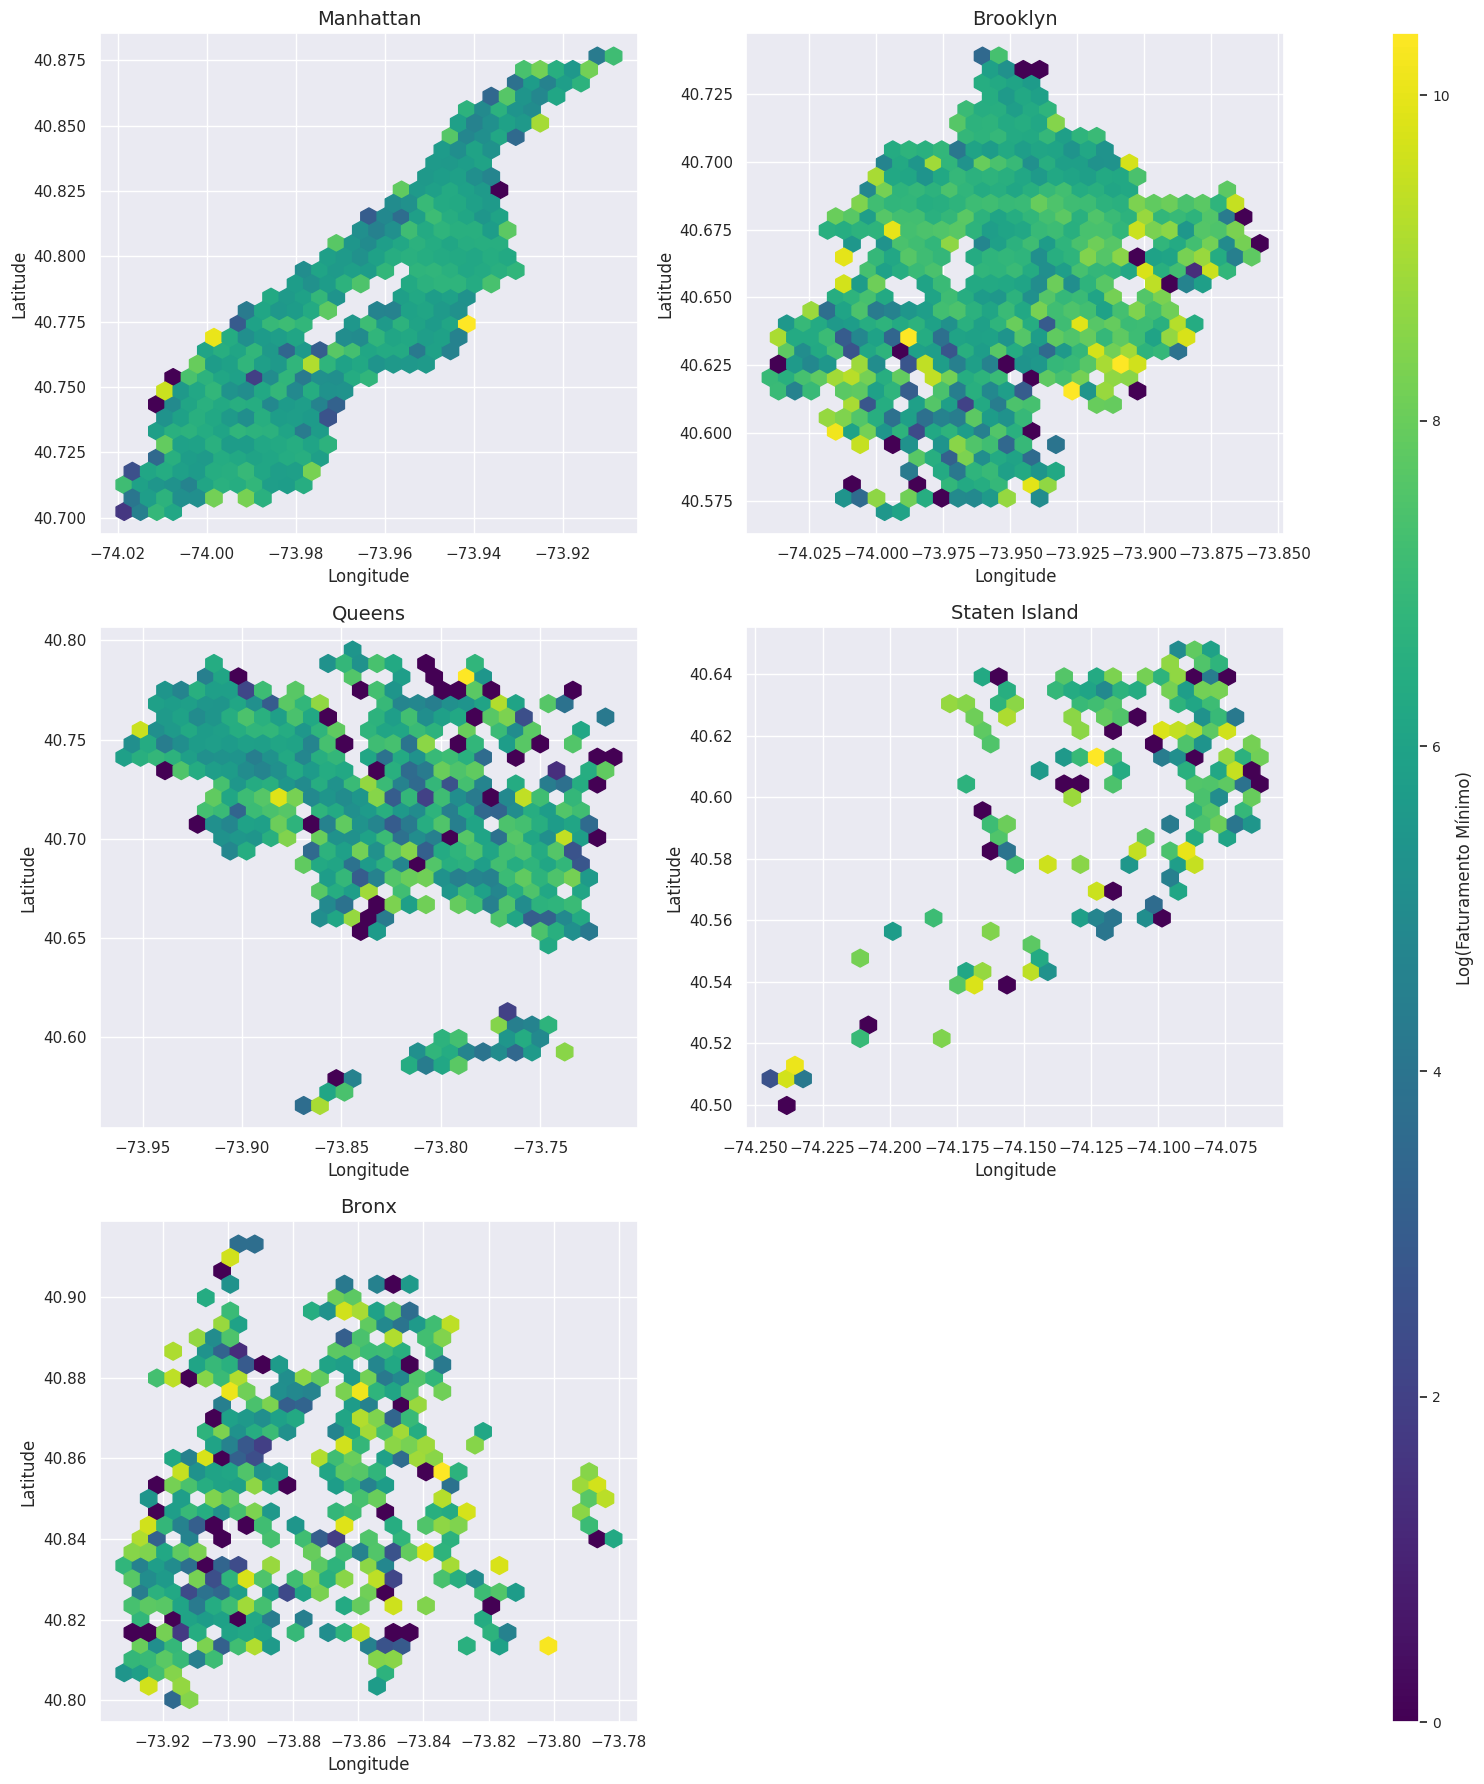

In [65]:
from matplotlib import gridspec

# Transformação logarítmica (opcional)
df_clean['log_faturamento_minimo'] = np.log1p(df_clean['faturamento_minimo'])

# Configuração dos subplots: 3 linhas e 2 colunas
unique_bairros = df_clean['bairro_group'].unique()
n_bairros = len(unique_bairros)

fig = plt.figure(figsize=(15, 18))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.05])  # Última coluna para a barra de cores

# Criar os subplots
axes = [fig.add_subplot(gs[i // 2, i % 2]) for i in range(n_bairros)]

for ax, bairro in zip(axes, unique_bairros):
    # Filtrar os dados por bairro
    bairro_data = df_clean[df_clean['bairro_group'] == bairro]

    # Criar o heatmap com hexbin
    hb = ax.hexbin(
        bairro_data['longitude'],
        bairro_data['latitude'],
        C=bairro_data['log_faturamento_minimo'],
        gridsize=30,
        cmap='viridis',
        reduce_C_function=np.mean
    )
    
    # Configurar título e rótulos
    ax.set_title(f'{bairro}', fontsize=14)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)

# Configurar a barra de cores em uma posição personalizada
cbar_ax = fig.add_subplot(gs[:, -1])  # Usar a última coluna para a barra de cores
cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.ax.set_ylabel('Log(Faturamento Mínimo)', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Ajustar layout para evitar sobreposições
plt.tight_layout()
plt.show()


Para melhor visualização, a escala do faturamento está em logarítmico. Desta forma, para cada escala, o faturamento aumenta em 10 vezes. Podemos notar que a região de Manhattan possui uma distribuição mais homogênea, já a região de Bronx possui uma distribuição mais heterogênea.

### 1.6 Análise dos Anúncios

Nosso objetivo é identificar se os nomes dos anúncios para lugares de maior valor ou de maior faturamento mínimo possuem características em comum. Para tal, iremos realizar uma análise de texto. Iremos verificar a frequência das palavras nos nomes dos anúncios com os preços mais altos. 

 - Iremos considerar anúncios com alto valor aqueles que o preço por noite seja igual ou superior $75\%$ dos anúncios do dataset;
 - Os textos de cada anúncio que se adequarem serão convertidos para minúsculos e tendo removidos pontuações;
 - Por fim, será analisado a frequência de cada palavra.

In [66]:
# Importando as bibliotecas necessárias para essa análise
from collections import Counter
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mhpedro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mhpedro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mhpedro/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [67]:
# Definindo o critério para o valor alto
alto_preco_percentil = df_clean['price'].quantile(0.75)
df_alto_preco = df_clean[df_clean['price']> alto_preco_percentil]
df_alto_preco.shape

(9931, 15)

In [68]:
df_alto_preco.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,faturamento_minimo,log_faturamento_minimo
count,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000
mean,40.731170,-73.968095,216.154365,2.843923,24.241970,2017-05-29 06:51:21.985701376,1.127550,6.404592,104.074816,13015.216997,7.013924
min,40.508680,-74.239860,155.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.707310,-73.991135,180.000000,2.000000,1.000000,2016-07-30 12:00:00,0.060000,1.000000,0.000000,555.000000,6.320768
50%,40.728800,-73.976670,200.000000,2.000000,6.000000,2019-04-14 00:00:00,0.480000,1.000000,35.000000,3200.000000,8.071219
75%,40.759900,-73.951980,250.000000,4.000000,25.000000,2019-06-22 00:00:00,1.730000,1.000000,201.000000,13500.000000,9.510519
max,40.902600,-73.716900,334.000000,11.000000,488.000000,2019-07-08 00:00:00,27.950000,327.000000,365.000000,488410.000000,13.098913
std,0.043348,0.037367,44.836400,1.762485,43.740659,NaN,1.489021,38.992271,125.263249,24553.019134,3.623145


Temos 9931 anúncios que podem ser considerados de alto valor com base nos critérios estabelecidos, com preços variando de 155 à 334 dólares, que representam cerca de $25\%$ dos anúncios no dataset.

Dando continuidade, vamos extrair os nomes desses anúncios.

In [69]:
lista_nomes = df_alto_preco['nome']

In [70]:
text = ' '.join(lista_nomes).lower()
text = re.sub(r'[^a-zA-Z\s]', '', text)
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text)
filtered_tokens = [w for w in tokens if not w in stop_words]

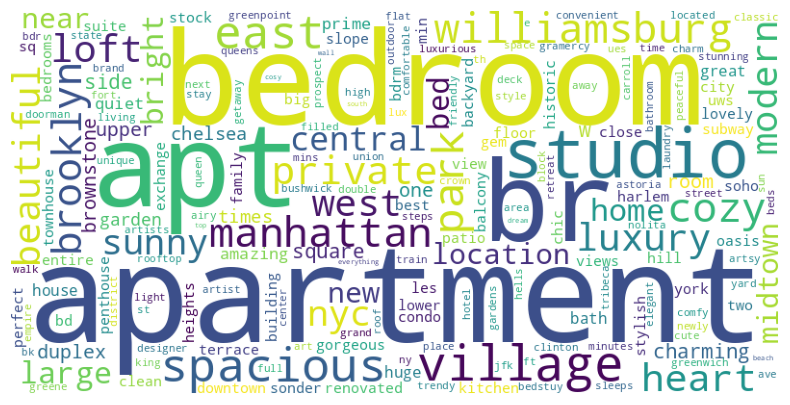

In [71]:
# Análise de frequência
palavras_frequentes = Counter(filtered_tokens)

# Visualização com WordCloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(palavras_frequentes)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

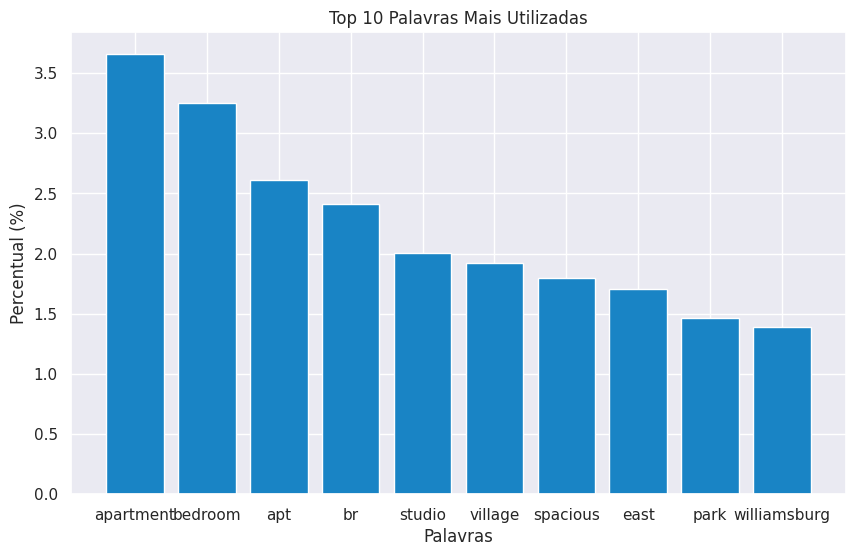

In [72]:
# Calculando percentuais
total_words = sum(palavras_frequentes.values())
percents = {word: (contagem / total_words) * 100 for word, contagem in palavras_frequentes.items()}

# Selecionando as top N palavras para visualização
top_n = 10
top_words = dict(sorted(percents.items(), key=lambda item: item[1], reverse=True)[:top_n])

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Palavras')
plt.ylabel('Percentual (%)')
plt.title('Top {} Palavras Mais Utilizadas'.format(top_n))
plt.show()

<span style="color: red;">
c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?
</span>

Com base nesses resultados, podemos observar que entre as 10 palavras mais citadas, temos em primeiro lugar "apartamento", seguido de "Banheiro" e em terceiro "apt". Resultado este que nos indica que os espaços de maior valor estão relacionados a lugares que fornecem o apartamento completo e que possuem  banheiros.

Outra característica são palavras que descrevem o estilo ou caracterizam os lugares, como por exemplo: "cozy", "luxury", "beautiful", "modern", "parking" e etc. Esta informação nos levar escolher quais palavras devemos associar aos anúncios de alto valor. 

### 1.7 Análise de Correlação

Iremos agora olhar a correção entre as variáveis, mas também a influência sobre a variável alvo `price`. Identificar o grau de correlação entre as variáveis é importante para indicar a força e a direção da relação linear entre a variável `price` e as demais.

Para darmos continuidade, precisamos de variáveis apenas numéricas, desta forma, iremos converter algumas variáveis categóricas em numéricas.

In [73]:
df_clean.head()

,nome,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,faturamento_minimo,log_faturamento_minimo
0,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,10125,9.222862
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2011-03-28,0.00,1,365,0,0.000000
2,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,24030,10.087100
3,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,7200,8.881975
4,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,44400,10.701017


In [74]:
# Convertendo variáveis categóricas em numéricas

df_corr = df_clean.copy()
df_corr.drop(columns=['log_faturamento_minimo'], inplace=True)
df_corr = pd.get_dummies(df_corr, columns=['bairro_group'])
df_corr = pd.get_dummies(df_corr, columns=['room_type'])

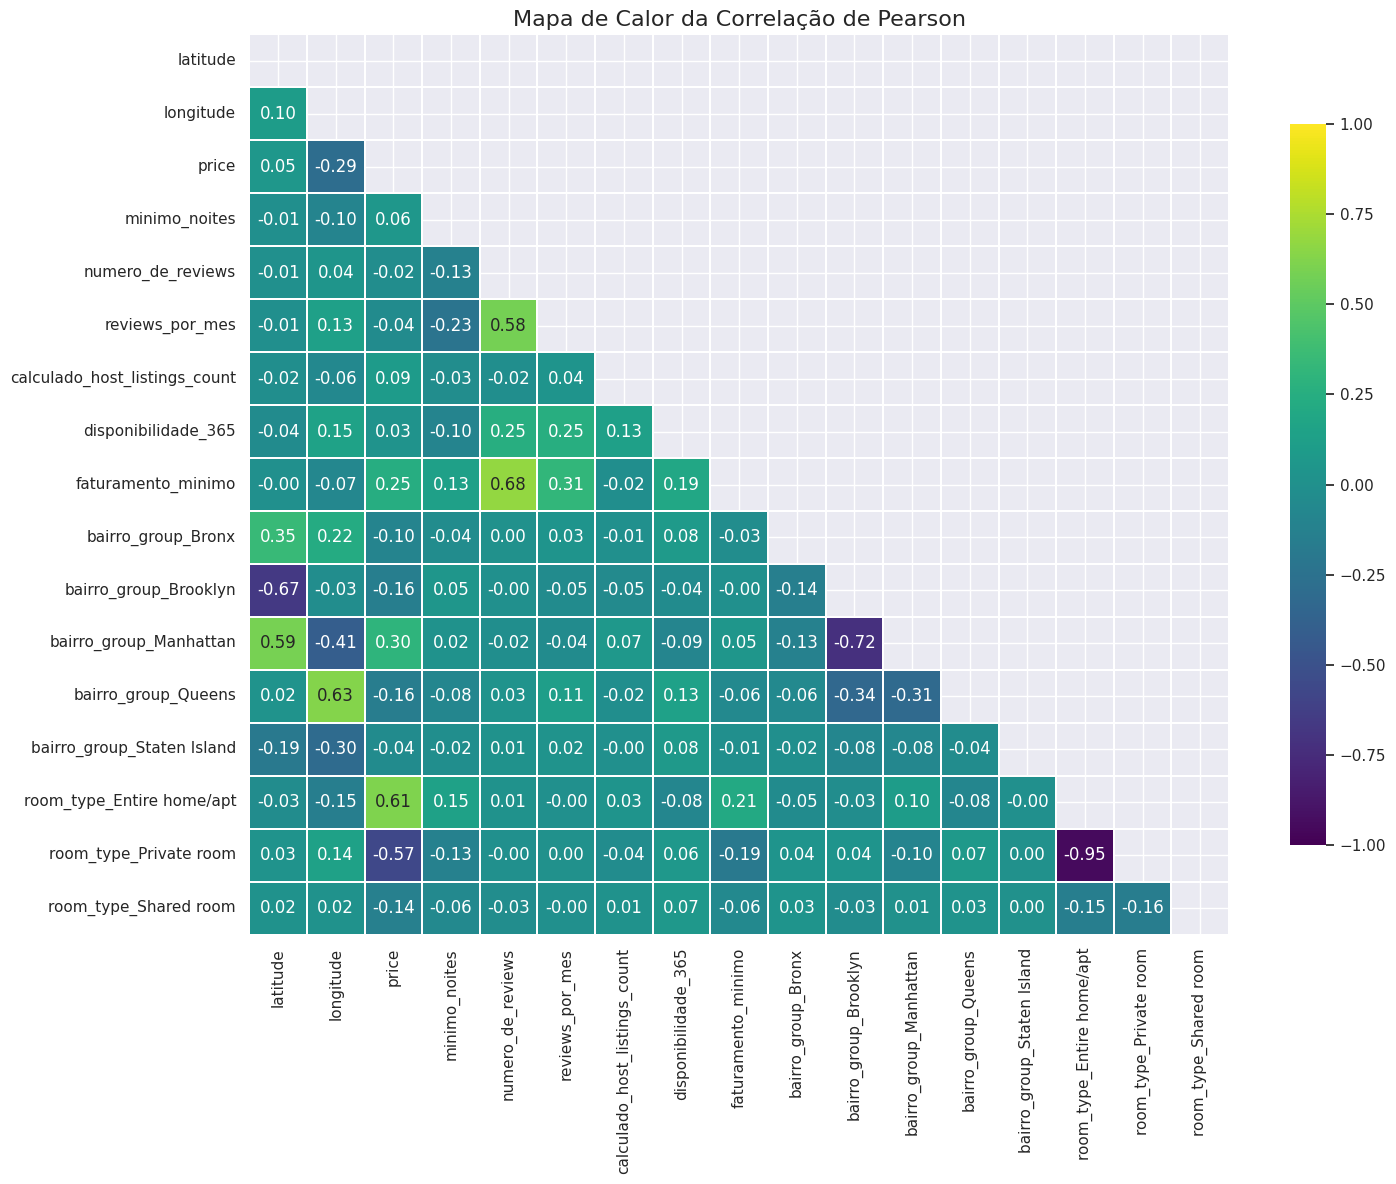

In [75]:
# Criando a matriz de correlação de Pearson (para relações lineares)
pearson_correlation_matrix = df_corr.corr(method='pearson', numeric_only=True)
# Gerando uma máscara para cobrir a diagonal superior
mask = np.zeros_like(pearson_correlation_matrix, dtype=bool)  # Substituído np.bool por bool
mask[np.triu_indices_from(mask)] = True

# Gerando o mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(
    pearson_correlation_matrix, 
    mask=mask,  # Aplica a máscara
    annot=True,  # Mostra os valores
    fmt=".2f",  # Formato dos valores
    cmap='viridis',  # Paleta de cores
    cbar_kws={'shrink': 0.8},  # Ajusta a barra de cores
    vmin=-1, vmax=1,
    center=0,  linewidths=.1
)
plt.title('Mapa de Calor da Correlação de Pearson', fontsize=16)
plt.tight_layout()
plt.show()

Com base no mapa de calor de correlação entre as variáveis, conseguimos obter algumas informações:

- Inicialmente, olhando para nossa variável alvo `price`, temos as seguintes correlações mais significativas:
    - Correlação positiva de 0.61 com `room_type_Entire home/apt` nos indicando que para este tipo de espaço, a variável `price` aumenta. 
    - Correlação positiva de 0.30 com `bairro_group_Manhattan`, também indicando que dentro dessa região a variável `price` aumenta.
    - Correlação positiva de 0.25 com `faturamento_minimo`, também indicando que o alto faturamento mínimo está relacionado com o aumento da variável `price`.
    - Correlação negativa de -0.29 com `latitude`, indicando que para regiões mais afastada em relação a latitude a variável `price` tende a diminuir.

Algumas dessas informações eram de se esperar, pois já sabíamos que espaços do tipo apartamento ou casa possuem maiores valores, assim como a região de Manhattan. Contudo. temos uma informação a mais que diz respeito a latitude, indicando que regiões mais ao norte ou sul, possuem preços mais baixos.

- Em relação ao a variável `faturamento_minimo` temos uma correlação positiva com `numero_de_reviews`cerca de 0.68 e com `reviews_por_mes` cerca de 0.31. Este resultado nos indica que espaços que recebem mais reviews tanto por mês ou no total, possuem um maior faturamento. O que nos levar a crer que estes espaços por serem mais avaliados, acabam atraindo mais pessoas. Desta forma, continuar promovendo campanhas de avaliações pelos clientes, podem ser  uma boa estratégias. 

- Temos algumas correlações negativas associadas as regiões e os espaços. Bairros mais procurados como Manhattan produz uma correlação negativa com Bronx (-0.72), assim como espaços privados (Home/apt) possui uma correlação negativa com quartos compartilhados (-0.95).


<span style="color: red;">
b) O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
</span>

Existe uma correlação positiva baixa entre essas duas variáveis, cerca de (0.06) e (0.03), respectivamente. O que nos levar a crer que o mínimo de noites e a disponibilidade ao logo do ano não interferem no preço.



## Fase 2 Criação do Modelo de Precificação

Iremos construir um modelo de predição com o objetivo de estimar o valor da variável alvo `price`. 

Com base nas análises das correlações, irei remover as seguintes variáveis `reviews_por_mes`, `calculado_host_listings_count`, `nome`, `ultima_review`  e `faturamento_minimo`.

Como estamos tratando de uma predição de um valor continuo, no caso o valor da variável alvo `price`, temos um problema de regressão. E iremos usar o modelo de regressão linear simples para gerar a predição.

Como parâmetros para realizar a avaliação do modelo, iremos construir métricas de performance. Iremos adotar  a Raiz Quadrada do Erro-Médio, assim como o Coeficiente de Determinação ($R^2$) e o Erro Médio Absoluto.

### 2.1 Modelo de Regressão Simples

Devemos separar os dados em variáveis dependentes (Y) e Variáveis independentes (x).

In [76]:
df_corr.head()

,nome,bairro,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,faturamento_minimo,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Skylit Midtown Castle,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,10125,False,False,True,False,False,True,False,False
1,THE VILLAGE OF HARLEM....NEW YORK !,Harlem,40.80902,-73.94190,150,3,0,2011-03-28,0.00,1,365,0,False,False,True,False,False,False,True,False
2,Cozy Entire Floor of Brownstone,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,24030,False,True,False,False,False,True,False,False
3,Entire Apt: Spacious Studio/Loft by central park,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,7200,False,False,True,False,False,True,False,False
4,Large Cozy 1 BR Apartment In Midtown East,Murray Hill,40.74767,-73.97500,200,3,74,2019-06-22,0.59,1,129,44400,False,False,True,False,False,True,False,False


In [77]:
# Removendo variáveis desnecessárias
df_model = df_corr.copy()
df_model= df_model.drop(columns=['nome', 'bairro', 'calculado_host_listings_count', 'ultima_review',
                                 'reviews_por_mes', 'faturamento_minimo'])
df_model.head()

,latitude,longitude,price,minimo_noites,numero_de_reviews,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.75362,-73.98377,225,1,45,355,False,False,True,False,False,True,False,False
1,40.80902,-73.94190,150,3,0,365,False,False,True,False,False,False,True,False
2,40.68514,-73.95976,89,1,270,194,False,True,False,False,False,True,False,False
3,40.79851,-73.94399,80,10,9,0,False,False,True,False,False,True,False,False
4,40.74767,-73.97500,200,3,74,129,False,False,True,False,False,True,False,False


In [78]:
# Definindo os valores de X e Y
X = df_model.drop(columns=['price'])
Y = df_model['price']

Agora que temos a variável independente e dependente separadas, iremos criar os subconjuntos de treinamento e teste de forma aleatória. Iremos adotar um percentual de $70\%$ para treino e $30\%$ para teste. 

In [79]:
# Separando os subconjuntos de treinamento e teste de forma aleatória
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [80]:
# Inicializando o modelo de regressão
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [81]:
# Prevendo os valores de Y
y_pred = regressor.predict(X_test)
print(y_pred)

[ 82.98978051 159.52733149 169.55245057 ... 167.26343795 113.84263892
 151.08955534]


In [82]:
# calculando R²
print("Coeficiente de Determinação (R²): {}".format(regressor.score(X_test, y_test)))

Coeficiente de Determinação (R²): 0.4775739534062188


O resultado do coeficiente de determinação nos indica que $51.11\%$ da variabilidade em Y pode ser explicada usando X.

In [83]:
# calculando RMSE
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("RMSE da Regressão Linear: {}".format(lin_rmse))

RMSE da Regressão Linear: 49.30564771887575


Temos que a média das diferenças ao quadrado entre os valores previsto pelo modelo e os valores reais  de Y é de $\$\,49.30$ dólares. Este resultado indica que o nosso modelo, em média, erra as previsões de preço por um valor de $\$\,49.30$ dólares.

In [84]:
# calculando o Erro Médio Absoluto (MAE)
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print("Erro Médio Absoluto (MAE): {}".format(lin_mae))

Erro Médio Absoluto (MAE): 36.30702698660454


O erro médio Absoluto é por volta de $\$\,36.30$ dólares. Esta métrica é menos sensível a outliers do que o RMSE. Por termos uma diferença entre essas duas métricas, podemos pensar que alguns outliers possam estar influência a medida de RMSE.

### 2.2 Criando previsão

Agora com o modelo criado, podemos fazer a previsão de preço dos anúncios para um novo conjunto de dados. Supondo que temos um conjunto de dados, conformo o que se segue:

```python
{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}
 ```

 Queremos prever qual é o valor da variável `price`.

In [85]:
# Novos dados para previsão
novo_dado = {'latitude': 40.75362,
            'longitude': -73.98377,
            'minimo_noites': 1,
            'numero_de_reviews': 45,
            'disponibilidade_365': 355,
            'bairro_group_Bronx': 0,
            'bairro_group_Brooklyn': 0,
            'bairro_group_Manhattan': 1,
            'bairro_group_Queens': 0,
            'bairro_group_Staten Island': 0,
            'room_type_Entire home/apt': 1,
            'room_type_Private room': 0,
            'room_type_Shared room': 0}

# Convertendo o novo dado em um DataFrame
novo_dado_df = pd.DataFrame([novo_dado])

# Fazendo a previsão com o modelo
previsao_price = regressor.predict(novo_dado_df)
print("Preço previsto:", previsao_price[0])

Preço previsto: 204.87557433213806


O resultado obtido é de $\$ 204.87$ dólares, sabendo que o nosso modelo possui um erro médio Absoluto é por volta de $\$\,36.30$ dólares.

Por fim, o modelo criado por ser salvo no formato pickles. 

In [86]:
import pickle
import os

# Caminho da pasta e nome do arquivo
folder_path = '../model'  # Caminho para a pasta
file_name = 'model.pkl'
full_path = os.path.join(folder_path, file_name)  # Combina a pasta e o nome do arquivo

# Garantir que a pasta exista
os.makedirs(folder_path, exist_ok=True)

# Salvar o modelo na pasta especificada
trained_model = regressor
with open(full_path, 'wb') as file:
    pickle.dump(trained_model, file)

print(f"Modelo salvo em: {full_path}")


Modelo salvo em: ../model/model.pkl


## Comentários finais

Neste projeto, foi conduzida uma análise exploratória detalhada e desenvolvido um modelo preditivo baseado em regressão simples para precificar aluguéis temporários na cidade de Nova York. Os insights gerados e o modelo construído fornecem uma base consistente para compreender os fatores determinantes dos preços dos aluguéis e para apoiar estratégias de precificação em plataformas de locação.

É fundamental, entretanto, destacar a importância do aprimoramento contínuo dos dados e dos modelos para garantir a precisão e a relevância das previsões. Recomenda-se a incorporação de fontes de dados adicionais, como tendências de mercado, eventos locais e variações sazonais, para captar melhor as complexidades do mercado de aluguéis temporários. Além disso, a experimentação com modelos mais sofisticados de Machine Learning, como redes neurais e modelos de ensemble, pode trazer insights complementares e elevar o desempenho das previsões. Este projeto representa um início promissor e deve ser encarado como um passo inicial para aprofundar a compreensão e prever as dinâmicas do mercado de locações temporárias.
